# Demand estimation and instrumental variables

In this project we specify a model to estimate supply and demand elasticities for gasoline

In [20]:
# Load libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

The datafiles needed to complete this problem set are available on the course GitHub repository.

In [21]:
data = '/Users/simitiangreg/Documents/econ_143/Datasets/'
graphics = '/Users/simitiangreg/Documents/econ_143/Graphics/'

## Part 1: Understanding equilibrium price and quantity data

The basic setting is as described in lecture. In each of $ i = 1 \ldots N$ markets we observe the market-clearing price and quantity pair $ (P_i, Q_i). $ The demand schedule in market $i$ is given by

$$ \ln Q_i^d(p) = \alpha_{d0} + \beta_{d0} \ln p + U_{di}, $$

while the corresponding supply schedule is

$$ \ln Q_i^s(p) = \alpha_{s0} + \beta_{s0} \ln p + U_{si}. $$

Marking clearing implies that

$$ Q_i = Q_i^d(P_i) = Q_i^s(P_i). $$

Here $U_{di}$ is a market-specific demand shock and $U_{si}$ a market-specific supply shock. We assume that the supply and demand schedules are otherwise homogenous across markets.    

Depending on the application, "markets" might be different cities (e.g., orange sales in 2021 across a sample of US cities) or perhaps different time periods within the same geographic region (e.g., monthly orange sales in Northern California from January 2010 to December 2021).    

Solving for the (log of) the market-clearing price, $\ln P_i$, yields

$$ \ln P_i = -\frac{\alpha_{s0}-\alpha_{d0}}{\beta_{s0}-\beta_{d0}} -\frac{U_{si}-U_{di}}{\beta_{s0}-\beta_{d0}}. $$

To get the corresponding market clearing (log-) quantity, $\ln Q_i$, we can substitute this expression for $\ln P_i$ into either the demand or supply schedule given above.   

Observe how the market-clearing prince depends on the demand and supply elasiticies, $\beta_{d0}$ and  $\beta_{s0}$, as well as the magnitudes of the supply and demand shocks, respectively $U_{di}$ and $U_{si}$. 

### Simulating a simple demand and supply system
The next block of code simulates $N = 100$ pairs $(\ln P_i, \ln Q_i)$ for the system outlined above. The demand and supply shocks are independently distributed mean zero normal random variables. Other parameters are as specified in the code block.


Three cases are considered. First, a setting where the variances of the demand and supply shocks are equal. Second, a setting where the variance of the demand shocks is small relative to that of the supply shocks. Third, the opposite case where the variance of the supply shocks is small relative to that of the demand shocks.

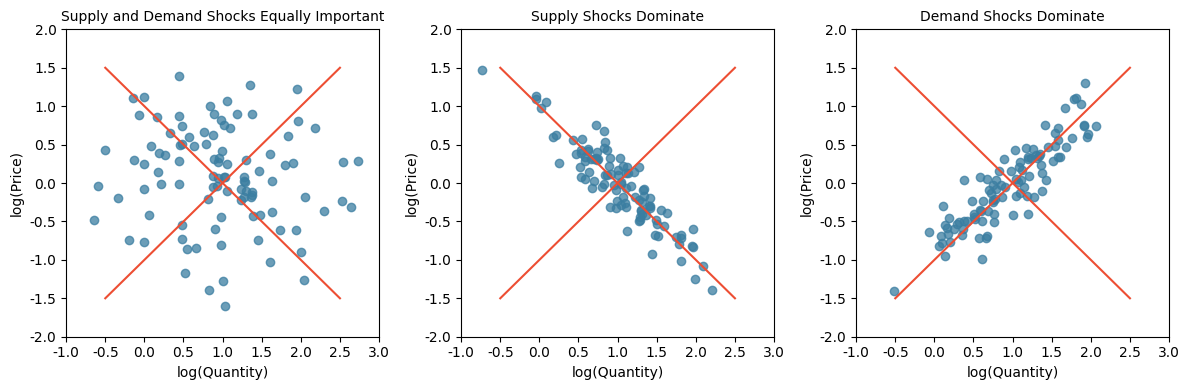

In [22]:
N = 100             # Number of markets to simulate

alpha_d =  1        # Demand and supply schedule parameters
beta_d  = -1
alpha_s =  1
beta_s  =  1

# Define figure object with three subplots
fig_supply_demand, sbp = plt.subplots(ncols=3, figsize=(12, 4))
ax0 = sbp[0] # Handle for left subplot
ax1 = sbp[1] # Handle for middle subplot
ax2 = sbp[2] # Handle for right subplot

#------------------------------------------------------#
#- CASE 1: SUPPLY AND DEMAND SHOCKS EQUALLY IMPORTANT -# 
#------------------------------------------------------#

plt.axes(ax0) # Select first subplot

# Simulate market clearing price quantity pairs for *Case 1*
U_d = np.random.normal(loc=0.0, scale=1.0, size=(N,))
U_s = np.random.normal(loc=0.0, scale=1.0, size=(N,))

logP = -(alpha_s-alpha_d)/(beta_s - beta_d) - (U_s - U_d)/(beta_s - beta_d)
logQ = alpha_s + beta_s*logP + U_s

# Draw scatter plot and underlying supply and demand schedules
ax0.scatter(logQ , logP, color = '#3B7EA1', alpha = 0.75)
plt.plot((alpha_s + beta_s*-1.5, alpha_s + beta_s*1.5), (-1.5, 1.5), color='#ED4E33')
plt.plot((alpha_d + beta_d*-1.5, alpha_d + beta_d*1.5), (-1.5, 1.5), color='#ED4E33')

ax0.set_title('Supply and Demand Shocks Equally Important', fontsize=10)
ax0.set_xlabel(r'log(Quantity)')
ax0.set_ylabel(r'log(Price)')
ax0.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
ax0.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])
ax0.set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
ax0.set_yticklabels(['-2.0', '-1.5', '-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0'])

#------------------------------------------------------#
#- CASE 2: SUPPLY SHOCKS DOMINATE                     -# 
#------------------------------------------------------#

plt.axes(ax1) # Select second subplot

# Simulate market clearing price quantity pairs for *Case 2*
U_d = np.random.normal(loc=0.0, scale=0.25, size=(N,))
U_s = np.random.normal(loc=0.0, scale=1.0, size=(N,))

logP = -(alpha_s-alpha_d)/(beta_s - beta_d) - (U_s - U_d)/(beta_s - beta_d)
logQ = alpha_s + beta_s*logP + U_s

# Draw scatter plot and underlying supply and demand schedules
ax1.scatter(logQ , logP, color = '#3B7EA1', alpha = 0.75)
plt.plot((alpha_s + beta_s*-1.5, alpha_s + beta_s*1.5), (-1.5, 1.5), color='#ED4E33')
plt.plot((alpha_d + beta_d*-1.5, alpha_d + beta_d*1.5), (-1.5, 1.5), color='#ED4E33')

ax1.set_title('Supply Shocks Dominate', fontsize=10)
ax1.set_xlabel(r'log(Quantity)')
ax1.set_ylabel(r'log(Price)')
ax1.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
ax1.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])
ax1.set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
ax1.set_yticklabels(['-2.0', '-1.5', '-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0'])

#------------------------------------------------------#
#- CASE 3: DEMAND SHOCKS DOMINATE                     -# 
#------------------------------------------------------#

plt.axes(ax2) # Select third subplot

# Simulate market clearing price quantity pairs for *Case 3*
U_d = np.random.normal(loc=0.0, scale=1.0, size=(N,))
U_s = np.random.normal(loc=0.0, scale=0.25, size=(N,))

logP = -(alpha_s-alpha_d)/(beta_s - beta_d) - (U_s - U_d)/(beta_s - beta_d)
logQ = alpha_s + beta_s*logP + U_s

# Draw scatter plot and underlying supply and demand schedules
ax2.scatter(logQ , logP, color = '#3B7EA1', alpha = 0.75)
plt.plot((alpha_s + beta_s*-1.5, alpha_s + beta_s*1.5), (-1.5, 1.5), color='#ED4E33')
plt.plot((alpha_d + beta_d*-1.5, alpha_d + beta_d*1.5), (-1.5, 1.5), color='#ED4E33')

ax2.set_title('Demand Shocks Dominate', fontsize=10)
ax2.set_xlabel(r'log(Quantity)')
ax2.set_ylabel(r'log(Price)')
ax2.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
ax2.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])
ax2.set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
ax2.set_yticklabels(['-2.0', '-1.5', '-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0'])

fig_supply_demand.tight_layout()  
plt.savefig(graphics + 'fig_supply_demand', bbox_inches='tight', dpi=500) 

### Commentary
Provide a short description of the main components of the code block above and how they collectively produce the three figures. Next discuss the figures themselves. What implications do these simulations have for understanding the structure of demand and supply in real world settings? Can you think of possible real world markets which might be qualitatively similar to each of the three simulated cases? Please place you answer in a separate markdown box immediately below this one.

$$-------------------------------------------------------------------------$$
$1A$

$\text{Coefficicents alpha and beta are set for both supply and demand.}$

$\text{Then, The hidden shocks, Us and Ud are simulated from a normal distribution with an sd of 1.}$

$\text{Log P and Log Q are then calculated given these 6 numbers.}$

$\text{The plots are then generated with the supply and demand lines.}$

$\text{These are presumably regression lines, but in this case they are only overlaid, not regressed.}$

$\text{Then some chart customization is done.}$

$----------------$

$\text{This process is repreated with identical steps,}$

$\text{Except in the second case, the hidden shocks, Us has an sd of .25 and Ud has a sd of 1.}$

$\text{And in the third case, the hidden shocks, Us has an sd of 1 and Ud has a sd of .25.}$
$$-------------------------------------------------------------------------$$

### Understanding the properties of OLS when prices are endogenous
Solve for the probability limit of the coefficient on $\ln P_i$ in the OLS fit of $\ln Q_i$ onto a constant and $\ln P_i$. Outline a set of conditions under which:

$$ \hat{\beta} \approx \beta_{d0}. $$

A second set of conditions where

$$ \hat{\beta} \approx \beta_{s0}. $$

Finally a set of conditions where

$$ \hat{\beta} \approx \frac{\beta_{d0} + \beta_{s0}}{2}. $$

In light of your answers, revist the three figures discussed earlier.    

If you know how to write in LaTex you may place your answers in a markdown box immediately below this one. If you do not know LaTex, you may handwrite your answers for this question neatly and turn them in to the GSI as a scanned pdf.


$$-------------------------------------------------------------------------$$
$1B$

From the "Lecture Notes" file we have already calcualted the two equations by taking the expectation:

$$lnQ = \frac{\beta_s (a^D + U^D)}{\beta_s- \beta_d} - \frac{\beta_d (a^S + U^S)}{\beta_s- \beta_d}$$

$$lnP = \frac{(a^D + U^D)}{\beta_s- \beta_d} - \frac{(a^S + U^S)}{\beta_s- \beta_d} = \frac{(U^D - U^S)}{\beta_s- \beta_d} - \frac{(a^D - a^S)}{\beta_s- \beta_d}$$

$$\mathbb{E}^*[lnQ|lnP]={\alpha} +{\beta}lnP$$

$$\text{We will use }\hat{\alpha}\text{ and }\hat{\beta} \text{ as our estimates for }{\alpha}\text{ and }{\beta}$$

$$ \hat{\beta} = \frac{\mathbb{C}(lnQ,lnP)}{\mathbb{V}(lnP)}$$

$$ \hat{\alpha} = \mathbb{E}(lnQ) - \hat{\beta} \mathbb{E}(lnP)$$

$$\text{If }\mathbb{C}(U^S, U^D) = 0, \text{ then we have:}$$

$$\mathbb{C}(lnQ,lnP) = \frac{\beta_d\mathbb{V}(U^D) + \beta_d\mathbb{V}(U^S)}{(\beta_d - \beta_s)^2}$$

$$\mathbb{V}(lnP) = \frac{\mathbb{V}(U^D) + \mathbb{V}(U^S)}{(\beta_d - \beta_s)^2}$$

$$\hat{\beta} = \beta_s\frac{\sigma^2(U^D)}{\sigma^2(U^D)+\sigma^2(U^S)} + \beta_d\frac{\sigma^2(U^S)}{\sigma^2(U^D)+\sigma^2(U^S)}$$
$$-------------------------------------------------------------------------$$


$$-------------------------------------------------------------------------$$

$1B cont.$

$\hat{\beta}$ is essentially the sum of $\beta_d$ multiplied by $\sigma^2(U^S)$ as a percentage of total variance: $\sigma^2(U^S) + \sigma^2(U^D)$,
and $\beta_s$ multiplied by $\sigma^2(U^D)$ as a percentage of total variance: $\sigma^2(U^S) + \sigma^2(U^D)$


If we have: $\sigma^2(U^S) >> \sigma^2(U^D)$, then we will have: $ \hat{\beta} \approx \beta_d. $

If we have: $\sigma^2(U^D) >> \sigma^2(U^S)$, then we will have: $ \hat{\beta} \approx \beta_s. $

If we have: $\sigma^2(U^D) \approx \sigma^2(U^S)$, then we will have: $ \hat{\beta} \approx \frac{\beta_d + \beta_d}{2}. $

When we have one variance much greater than the other, we can end up with an accurate measure of $\hat{\beta}$, which we can see in graphs 2 and 3. However, in graph 1, we will have some average of each elasticity, which will give us an odd estimate where we will be unable to truly 

$$-------------------------------------------------------------------------$$

### Excise Taxes
Assume the demand and supply system outlined above characterizes the market for automobile gasoline across US metropolitan areas. In this example the "price" corresponds to the price of a gallon of gasoline, and the "quantity" to the total number of gallons sold in a market. To be concrete a "market" might be the San Francisco Bay Area in the first quarter of 2022.    

Answer the following questions in a markdown box immediately below this one. If you do not know LaTex, you may handwrite your answers for this question neatly and turn them in to the GSI as a scanned pdf..   
1. Explain how knowledge of $\beta_{d0}$ and $\beta_{s0}$ could be used to predict the likely equilibrium price and quantity effects of an increase in the gasoline excise tax (to learn more about the gasoline excise tax consult the 2009 Congressional Research Services report _The Role of Federal Gasoline Excise Taxes in Public Policy_ by Robert Pirog (available online at https://crsreports.congress.gov/).   
2. When is the burden of an excise tax primarily bourne by consumers? By producers?    
3. List two possible benefits of a gasoline excise tax? List two possible downsides.

$$-------------------------------------------------------------------------$$
$1C)i$

From the Lecture Notes File, we know that the change in Price with respect to Tax is:

$$ \frac{dP}{d\tau}= \frac{\beta_s}{\beta_s - \beta_d} $$

We also know that the change in Price with respect to Quantity is: 

$$ \frac{dQ}{d\tau}= \frac{\beta_s\beta_d}{\beta_s - \beta_d}\frac{Q}{P} = \frac{\beta_s\beta_d}{\beta_s - \beta_d}*Q_{perdollar}$$

If given these two coefficients, we would be able to acurately predict the change in price and quantity. 

$1C)ii$

The tax on the supplier can be visualized as an added cost to production, or an upward increase in the supply curve. This means there is going to be a higher price at a lower quantity, but whether price or quantity moves more is case-specific. A low $\beta_s$ indicates inelastic supply and a low (absolute) $\beta_d$ indicates inelastic demand. Conversly, when $\beta_d$ is very negative, it is very elastic. 

When the supply-side tax is levied, consumers will bear a larger portion of the tax if they are inelastic (high absolute coefficient). However, if $\beta_d$ is absolutely very low, $0 ≤|\beta_d| ≤1$, then suppliers will bear the burden with lower revenues.

$1C)iii$

Two upsides:

1) The negative externality of burning fossil fuels is typically unpriced. If the tax were introduced, then we would also be paying the cost of the negative externality. This would either cut back spending on gasoline (directly good for the environement) or it would give the governement excess revenue that would be used to fund other climate related initiatives. An example is during the Ford Administration, an increase in gasoline taxes to fund alternative energy sources by allocating revenues to a trust fund was proposed, but never passed.

2) The United States is often very reliant on imported gasoline, one example is the oil embargo against the US from 1973-1974. Because energy is a large input good in any product, the restricted supply contributes to inflation. To act as an deflationary force, the Nixon administration considered using an oil tax to reduce demand. This might be an upside, but it too was never passed.

Two downsides:

1) Any tax decreases consumers' real purchasing power. The cited source from the CRS notes that this might be especially bad during a recession. This makes consumers poorer in real terms and creates an added problem because the governement isn't able to spend the taxed money exactly how consumers would be satisfied with.

2) Because the energy markets are volatile, the gasoline tax might shift consumer prefrences in more ways than one. An example is that consumer would buy cars based on gasoline prices. Because high prices increase the desireability of In the CRS report, it is highlighted that this leads to "consumers buying the “wrong type” of vehicle for the next gasoline price cycle." 

$$-------------------------------------------------------------------------$$

## Part 2: Estimating the price elasticity of demand by the method of instrumental variables
The next block of code loads a sample of records from the 2001 National Household Travel Survey (NHTS). This is sample was used by Richard Blundell, Joel L. Horowitz and Matthias Parey in their 2012 _Quantitative Economics_ paper "Measuring the price responsiveness of gasoline demand: economic shape restrictions and nonparametric demand estimation" (available online at https://qeconomics.org/). Only a subset of the data used in their paper is included in the file below. This is because NHTS survey data for households in small states is not released for confidentiality reasons. The sample below includes data from the 34 largest states in the US.

In [23]:
gas = pd.read_csv (data + 'Blundell_etal_QE2012_gasoline_demand_data_copy.csv')
gas[0:5]

,log_q,log_p,log_y,share,log_hhsize,log_driver,log_hhr_age,total_wrkr,publictransit_d,cl5_smtown_d,...,cl5_urban_d,popdensity_d2,popdensity_d3,popdensity_d4,popdensity_d5,popdensity_d6,popdensity_d7,popdensity_d8,state_fips,distance_oil1000
0,8.143545,0.229807,9.433484,0.346410,1.609438,1.386294,3.465736,3,0,0,...,0,0,0,1,0,0,0,0,1,0.657088
1,8.034972,0.229909,11.119883,0.057556,1.098612,0.693147,3.610918,1,0,0,...,0,0,0,0,1,0,0,0,1,0.657088
2,7.608235,0.229826,10.768485,0.053374,1.098612,0.693147,3.258097,2,0,1,...,0,0,1,0,0,0,0,0,1,0.657088
3,7.452868,0.229807,11.695247,0.018087,1.098612,0.693147,3.465736,2,0,1,...,0,1,0,0,0,0,0,0,1,0.657088
4,7.807454,0.229786,11.695247,0.025784,1.386294,1.098612,3.931826,2,0,1,...,0,1,0,0,0,0,0,0,1,0.657088


The next block of code imports a concordance of state FIPS (Federal Information Processing Standard) codes to state names and postal code abbrevations.

In [24]:
fips = pd.read_csv (data + 'State_Fips_Codes_copy.csv')
fips[0:5]

,Name,Postal_Code,state_fips
0,Alabama,AL,1
1,Alaska,AK,2
2,Arizona,AZ,4
3,Arkansas,AR,5
4,California,CA,6


Next we merge the fips data with the household-level data.

In [25]:
gas=gas.merge(fips, left_on='state_fips', right_on='state_fips')

Blundell and co-authors include the variable _distance_oil1000_ in their dataset. In measures the distance, in thousands of kilometers, from the Gulf of Mexico oil ports to the capital of the state in which the NHTS-sampled household resides.    

The following block of code computes average log gas prices at the state-level.

In [26]:
state = gas[['log_p','distance_oil1000','Postal_Code']].groupby('Postal_Code').mean()
state[0:5] 

,log_p,distance_oil1000
Postal_Code,,
AL,0.229750,0.657088
AR,0.250454,0.785453
AZ,0.300250,2.140950
CA,0.361413,2.863726
CO,0.376864,1.853738


Next we plot the avergae log gas price as a function of distance to the Gulf of Mexico.

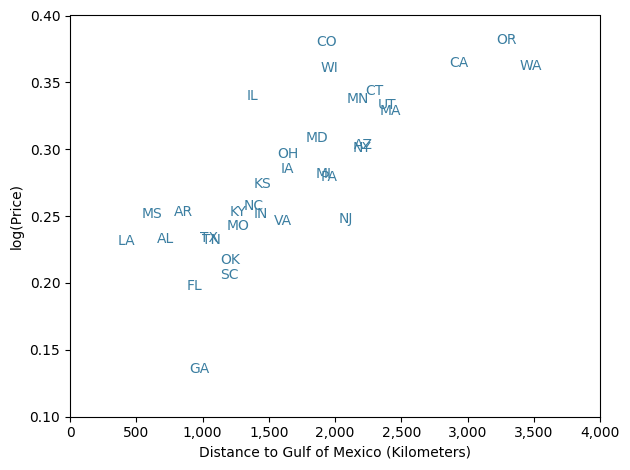

In [27]:
# Plot aggregate firm-to-firm sales by year
fig_gas_price_X_gulf_distance, ax = plt.subplots()

color = '#3B7EA1'                                                                        # Founder's Rock
ax.set_xlabel(r'Distance to Gulf of Mexico (Kilometers)')
ax.set_ylabel(r'log(Price)')
s = ax.scatter(state['distance_oil1000'], state['log_p'], alpha = 0)

ax.tick_params(axis='y')
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
ax.set_xticklabels(['0', '500', '1,000', '1,500', '2,000', '2,500', '3,000', '3,500', '4,000'])
ax.set_yticks([0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4])
ax.set_yticklabels(['0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40'])

for i, label in enumerate(state.index.values):
    ax.annotate(label, (state['distance_oil1000'][i], state['log_p'][i]), color=color)


fig_gas_price_X_gulf_distance.tight_layout()  
plt.savefig(graphics + 'fig_gas_price_X_gulf_distance', bbox_inches='tight', dpi=500) 

### Cost-shifters as instrumental variables
Comment on the figure above. Describe why distance to the Gulf of Mexico might be a cost-shifter, or supply-side "shock", for automobile gasoline. Argue that this variable is independent of the unobserved determinants of demand for gasoline, $U_{di}$. Argue the opposite. Describe how this variable can be used to provide a consistent estimate of $\beta_{d0}$. Please place you answers in a markdown box immediately below this one.

$$-------------------------------------------------$$

$2A$

The distance from the Gulf of Mexico can be seen as an exogenous shock, because it is something geographical. Businesses and consumers will demand the same amount of gasoline independant from the distance from the gulf of mexico. This is a cost-shifter because greater transportation distances will increase the price of the gasoline.

One can argue that this is endogenous however, because businesses who might want to consumer more, would strategically place themselves near cheaper gasoline. Some examples of this could include chemical manufacturing and aerospace and defense industries, who's gasoline consumption is a large proportion of their input costs. This might create an endogeniety problem. 

We can use this distance as an instrumental variable because it is both relevant (has a strong first stage) and exogenous (satisfies the exclusion restriction). This constitues a consistent estimator, as long as there is no ommitted variable bias. 
$$-------------------------------------------------$$

### Estimation
1. Replicate columns 1 and 2 of Table 2 in the paper by Blundell and co-authors using OLS. Note your numbers won't match exactly because their dataset includes some restricted access data from smaller states. "Cluster" your standard errors at the state level.

2. Fit the same two specifications, now using distance to the Gulf of Mexico as an excluded instrumental variable for log(Price). Again cluster your standard errors at the state level.

3. Does the coefficient on log(Price) consistently estimate the price elasiticity of demand or price elasiticity of supply? Describe another instrumental variables procedure for estimating the price elasticity not estimated here.

$$---------------------------------------------------------$$
$2B)i$

Replicated Columns 1 and 2 with cluster
$$---------------------------------------------------------$$



In [28]:
import statsmodels.api as sm
gas = sm.add_constant(gas)
column1 = sm.OLS(gas['log_q'], gas[['const', 'log_p', 'log_y']])
results1 = column1.fit(cov_type='cluster', cov_kwds={'groups': gas['state_fips']})

column2 = sm.OLS(gas['log_q'], gas[['const', 'log_p', 'log_y', 'log_hhr_age', 'log_hhsize', 'log_driver', 'total_wrkr']])
results2 = column2.fit(cov_type='cluster', cov_kwds={'groups': gas['state_fips']})

#results1.summary()
#results2.summary()gas

s1 = results1.params
s1.name = 'col1'
s2 = results2.params
s2.name = 'col2'

table2 = pd.merge(s1, s2, left_index=True, right_index=True, how='outer')
table2

,col1,col2
const,3.623017,3.467884
log_driver,NaN,0.520238
log_hhr_age,NaN,-0.013579
log_hhsize,NaN,0.060875
log_p,-0.834445,-0.792550
log_y,0.338540,0.297671
total_wrkr,NaN,0.083433


$$---------------------------------------------------------$$

$2B)ii$

Regressions 1 and 2 with IV Regression and Cluster

$$---------------------------------------------------------$$


In [29]:
from linearmodels.iv import IV2SLS

iv1 = IV2SLS(dependent=gas['log_q'], 
    exog=gas[['const', 'log_y']], 
    endog=gas['log_p'], 
    instruments=gas['distance_oil1000'])

iv1.fit(cov_type='clustered', clusters = gas['state_fips'])

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  log_q   R-squared:                      0.0945
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0940
No. Observations:                3640   F-statistic:                    307.37
Date:                Wed, Jun 07 2023   P-value (F-stat)                0.0000
Time:                        11:11:17   Distribution:                  chi2(2)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          3.6954     0.3091     11.955     0.0000      3.0895      4.3012
log_y          0.3403     0.0243     14.007     0.0000      0.2926      0.3879
log_p         -1.1538     0.2891    -3.9917     0.0001     -1.7204     -0.5873
==============================================================================

Endogenous: log_p
Instruments: distance_oil1000
Clustered Covariance (One-Way)
Debiased: False
Num Clusters: 34
IVResults, id: 0x16c1e9990

In [30]:
iv2 = IV2SLS(dependent=gas['log_q'], 
    exog=gas[['const', 'log_y', 'log_hhr_age', 'log_hhsize', 'log_driver', 'total_wrkr']], 
    endog=gas['log_p'], 
    instruments=gas['distance_oil1000'])

iv2.fit(cov_type='clustered', clusters = gas['state_fips'])

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  log_q   R-squared:                      0.1619
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1605
No. Observations:                3640   F-statistic:                    818.49
Date:                Wed, Jun 07 2023   P-value (F-stat)                0.0000
Time:                        11:11:17   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           3.5234     0.3342     10.543     0.0000      2.8684      4.1784
log_y           0.2992     0.0250     11.958     0.0000      0.2502      0.3483
log_hhr_age    -0.0130     0.0402    -0.3230     0.7467     -0.0919      0.0659
log_hhsize      0.0648     0.0407     1.5907     0.1117     -0.0150      0.1446
log_driver      0.5165     0.0750     6.8858     0.0000      0.3695      0.6635
total_wrkr      0.0838     0.0148     5.6676     0.0000      0.0548      0.1127
log_p          -1.0657     0.2973    -3.5844     0.0003     -1.6485     -0.4830
===============================================================================

Endogenous: log_p
Instruments: distance_oil1000
Clustered Covariance (One-Way)
Debiased: False
Num Clusters: 34
IVResults, id: 0x29623bfd0

$$---------------------------------------------------------$$

$2B)iii$

Does the coefficient on log(Price) consistently estimate the price elasiticity of demand or price elasiticity of supply? Describe another instrumental variables procedure for estimating the price elasticity not estimated here.

$$---------------------------------------------------------$$


Log quantitiy is negative in log_p when using the instrument 'distance'. We can interpreht this coefficient as 'percent change in quantity for every 1000 kilometers away from the gulf of mexico' (above some constant which represents being born exactly on the gulf of mexico, which is our uninterpehtable coefficicent). We hypothesized that this 'supply shock' is not endogenous (would not effect demand) and we saw that this upward move of the supply curve, means that we have a shift along the demand curve. Demand does respond, but it is not too elastic. Only a -1.06% change in *quantity* per every 1K kilometer distance.

Idea 1)

For this example, an idea I had is using Canadian data. Say we had similar panel data (time series and cross section for states), we could track when Canadian truck drivers went on strike. This can serve as a natural experiment which is purely a supply shock, becasue consumers do not shift their demand. For this analysis, we would have to seperate out demand from consumers vs. businesses, because we can hypothsize that trucking companies would be large consumers of gasoline, which might skew results if we ran it on both groups. By focusing the analysis on consumers, we can identify the affect of prices on quantity, because a strike is unlikely to affect gasoline prices, and would likely only push demand up.

Idea 2)

Natural experiemnt could be unexpected oil shocks from extreme wetaher. For this, we would have to run an analsyis which would exclude states that are affected by extreme weather, but that are important to oil production. For this, we can use hurricane Katrina, hitting the state of Lousiana. The state's crude production fell from 7.5K barrels per month to 3.8K. US production fell from 160K to 125K a month, but a better benchmark might be the 150K level. States like Alabama and Mississippi also fell in production, but their exclusion still doesn't answer why US data fell by about 35K from August to September. Either way, this dummy variable instrument of a natural disaster can be used to track the effect on price, and from price to quantity. We should exlcude states servely hit by the disater becasue clearly, their demand would go down. Whether their demand disapearing creates an endogeniety problem (lower prices because less ~overall~ demand from a specific states) could be debated. 


$$---------------------------------------------------------$$


## Part 3: Reflection
Summarize what you have learned by completing this problem set. What parts remain uncertain or unclear? Are there topics you would like to learn more about? Place your answer in a markdown box below this one.

1)

Figure out what that crazy test statistic is saying in the quant-econ paper.

2)

Review the math for clustered SE's. Seems important. SE's get larger because sample size get's smaller? Probably.

3)

Methods to deal with situations when supply and demand shocks are equally large?


